In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ulaanbaatar-air-quality/tolgoit-ulaanbaatar-air-quality.csv
/kaggle/input/ulaanbaatar-air-quality/misheel-expo ulaanbaatar-air-quality.csv
/kaggle/input/ulaanbaatar-air-quality/nisekh-ulaanbaatar-air-quality.csv
/kaggle/input/ulaanbaatar-air-quality/bayankhoshuu-ulaanbaatar-air-quality.csv
/kaggle/input/ulaanbaatar-air-quality/amgalan-ulaanbaatar-air-quality.csv
/kaggle/input/ulaanbaatar-air-quality/ulaanbaatar-us embassy-air-quality.csv
/kaggle/input/ulaanbaatar-air-quality/m.n.b.-ulaanbaatar-air-quality.csv


# Ulaanbaatar air quality data visualization analysis

### About Ulaanbaatar

Ulaanbaatar, the capital city of Mongolia, is one of the coldest and most polluted capitals during winter times. Despite the vast territory of Mongolia, 1.5 million people - half of the population - live in a small capital city which was designed for a population of only 400000. Air pollution in Ulaanbaatar reaches to hazardous level during the winter when residents in "ger" district start using coal-burning stove as a heater. 


![Ger District](https://www.ccacoalition.org/sites/default/files/styles/half_content_width/public/18262091_304.jpg?itok=AicjmQ1j&timestamp=1584443528)

### Ban of raw coal

On 15th of May, 2019, the Government of Mongolia banned the consumption of raw coal and introduced "refined coal briquettes" in response to fighting the air pollution. Since the start of this policy, the smog in Ulaanbaatar city noticably decreased. Even the smog seemed to be partly disappeared visually since the ban of raw coal, it's important to check whether the actual particulate matter in the air decreased. Thus, this data visualization will mostly focus on how the ban on raw coal changed the air quality. 

![Refined Coal](https://scx2.b-cdn.net/gfx/news/2019/ulaanbaatari.jpg)

### PM2.5 AND PM10

Particulate matter(PM) is a mixture of many harmful solid particles and liquid droplets in the air such as soot, smoke, metals, nitrates, sulphates, dust water and rubber etc. PM2.5 refers to the atmospheric particulate matter that has a diameter of less than 2.5 micrometres, which is about 3% of the diameter of human hair. PM10 are the particles with a diameter of 10 micrometers and they are also called fine particles. The air is considered safe to breathe when the quantity of PM2.5 in the air is 60 and PM10 is 100.

Note: Various studies show that PM2.5 has more severe health effects than PM10 as PM2.5 particles are so small that they can get deep into the lungs and bloodstream whereas PM10 particles can only pass through the throat, nose and surface of lung in the short term.




### Data
Data from air quality monitors in Ulaanbaatar is used in this notebook.
**Location of air quality monitors in Ulaanbaatar are shown on a map below.**

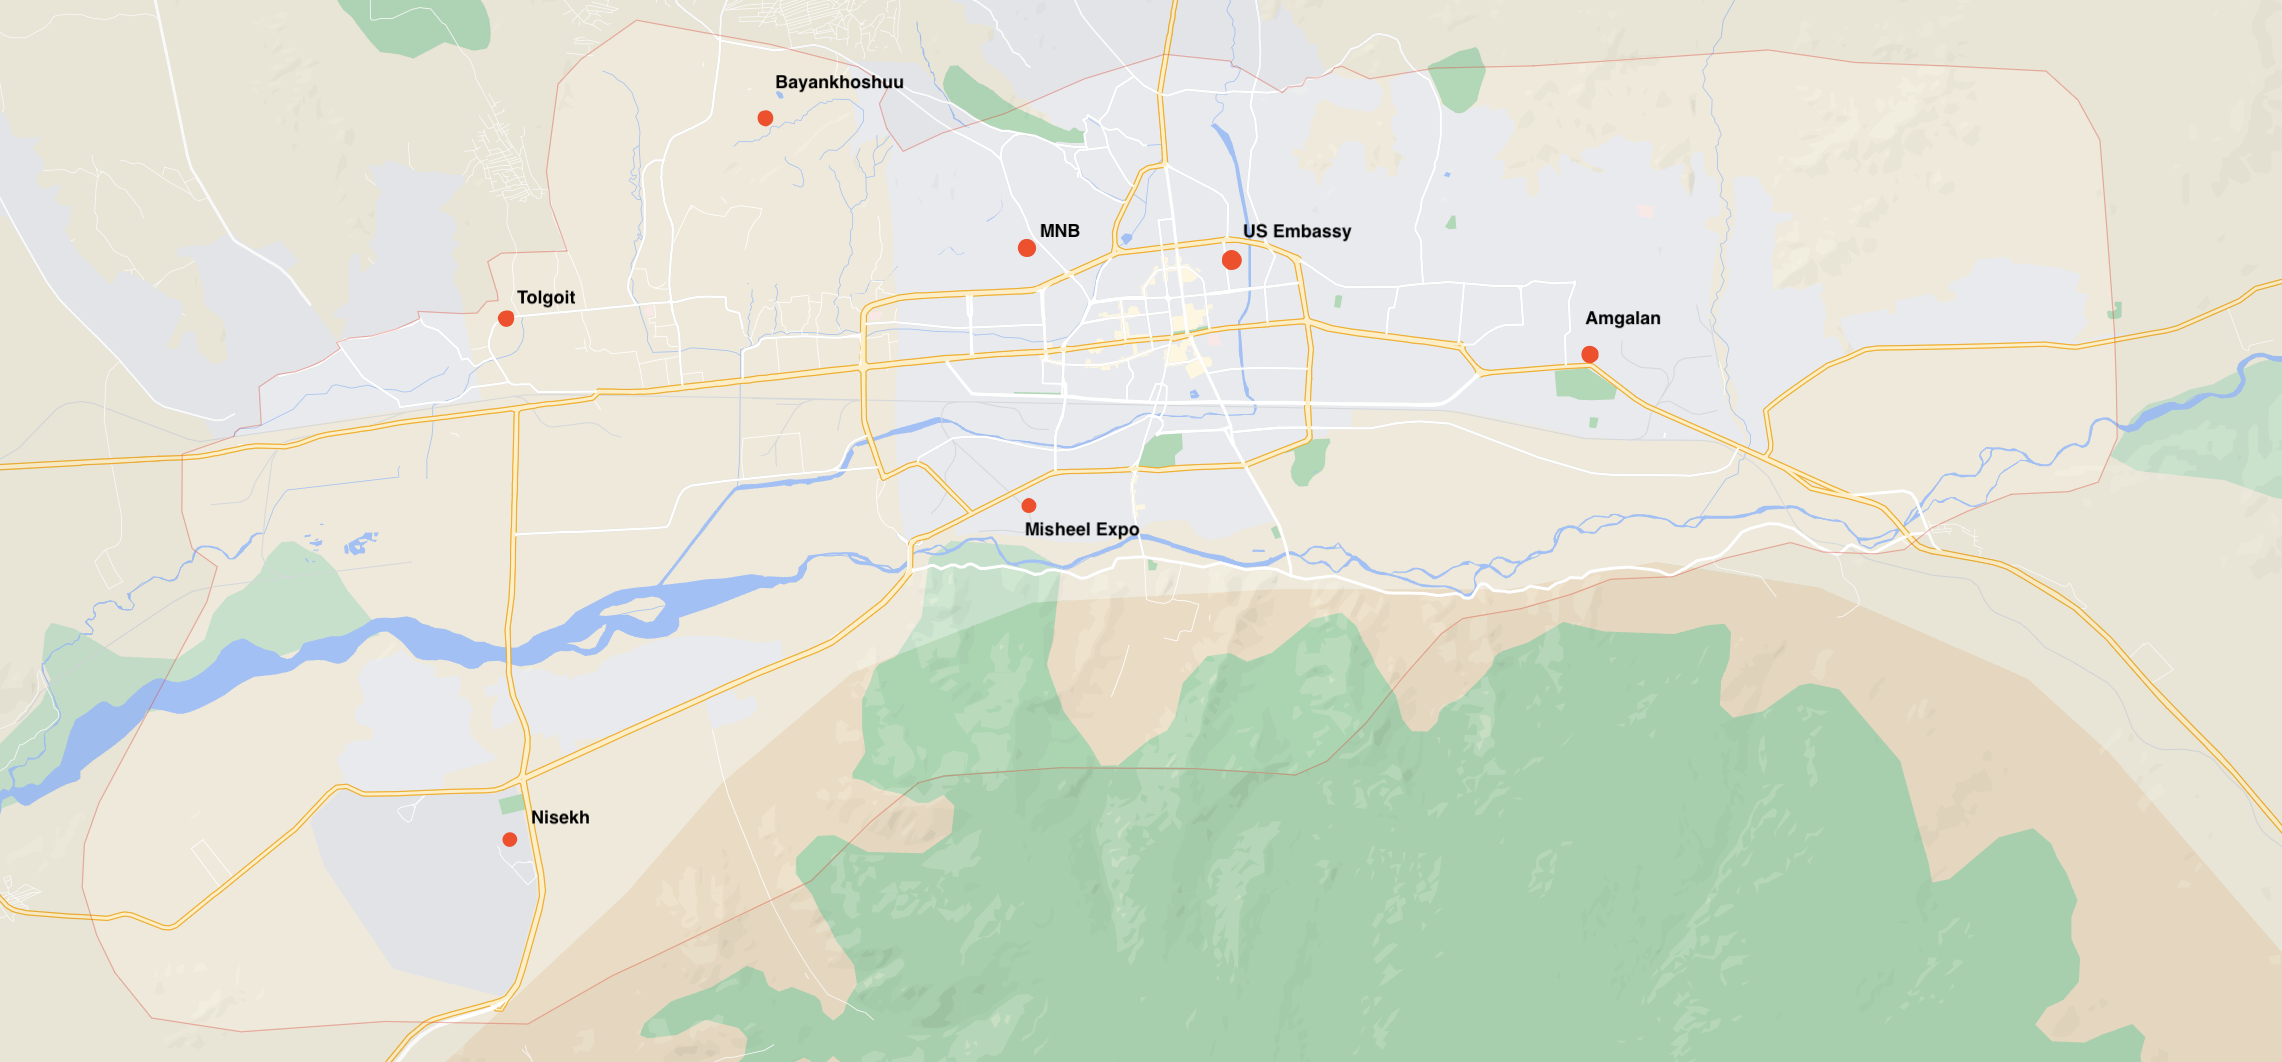

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#loading datasets
am = pd.read_csv("../input/ulaanbaatar-air-quality/amgalan-ulaanbaatar-air-quality.csv")
to = pd.read_csv("../input/ulaanbaatar-air-quality/tolgoit-ulaanbaatar-air-quality.csv")
mi = pd.read_csv("../input/ulaanbaatar-air-quality/misheel-expo ulaanbaatar-air-quality.csv")
bh = pd.read_csv("../input/ulaanbaatar-air-quality/bayankhoshuu-ulaanbaatar-air-quality.csv")
ni = pd.read_csv("../input/ulaanbaatar-air-quality/nisekh-ulaanbaatar-air-quality.csv")
us = pd.read_csv("../input/ulaanbaatar-air-quality/ulaanbaatar-us embassy-air-quality.csv")
mnb = pd.read_csv("../input/ulaanbaatar-air-quality/m.n.b.-ulaanbaatar-air-quality.csv")

In [4]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2421 non-null   object
 1    pm25   2421 non-null   object
 2    pm10   2421 non-null   object
 3    o3     2421 non-null   object
 4    no2    2421 non-null   object
 5    so2    2421 non-null   object
 6    co     2421 non-null   object
dtypes: object(7)
memory usage: 132.5+ KB


Quick observation: These monitors started recording data at different times, and there are approximately 5 to 7 years of data(looking at the row number). Unfortunately, some monitors do not record certain type of air quality. 

In [5]:
#Converting data type of date (object to datetime)
am['date'] = pd.to_datetime(am['date'])
bh['date'] = pd.to_datetime(bh['date'])
mnb['date'] = pd.to_datetime(mnb['date'])
mi['date'] = pd.to_datetime(mi['date'])
ni['date'] = pd.to_datetime(ni['date'])
to['date'] = pd.to_datetime(to['date'])
us['date'] = pd.to_datetime(us['date'])



In [6]:
#Removing space from column names
am.columns = am.columns.str.replace(' ','')
am = am.sort_values(by = 'date', ascending = False)
#Converting data type of columns except date
cols_to_convert_am = am.columns.drop('date')
am[cols_to_convert_am] = am[cols_to_convert_am].apply(pd.to_numeric, errors='coerce')

In [7]:
#Doing same data cleaning for other data sets
#Bayankhoshuu
bh.columns = bh.columns.str.replace(' ','')
bh = bh.sort_values(by = 'date', ascending = False)
cols_to_convert_bh = bh.columns.drop('date')
bh[cols_to_convert_bh] = bh[cols_to_convert_bh].apply(pd.to_numeric, errors='coerce')
#MNB
mnb.columns = mnb.columns.str.replace(' ','')
mnb = mnb.sort_values(by = 'date', ascending = False)
cols_to_convert_mnb = mnb.columns.drop('date')
mnb[cols_to_convert_mnb] = mnb[cols_to_convert_mnb].apply(pd.to_numeric, errors='coerce')
#Misheel expo
mi.columns = mi.columns.str.replace(' ','')
mi = mi.sort_values(by = 'date', ascending = False)
cols_to_convert_mi = mi.columns.drop('date')
mi[cols_to_convert_mi] = mi[cols_to_convert_mi].apply(pd.to_numeric, errors='coerce')
#Nisekh
ni.columns = ni.columns.str.replace(' ','')
ni = ni.sort_values(by = 'date', ascending = False)
cols_to_convert_ni = ni.columns.drop('date')
ni[cols_to_convert_ni] = ni[cols_to_convert_ni].apply(pd.to_numeric, errors='coerce')
#Tolgoit
to.columns = to.columns.str.replace(' ','')
to = to.sort_values(by = 'date', ascending = False)
cols_to_convert_to = to.columns.drop('date')
to[cols_to_convert_to] = to[cols_to_convert_to].apply(pd.to_numeric, errors='coerce')
#US embassy
us.columns = us.columns.str.replace(' ','')
us = us.sort_values(by = 'date', ascending = False)
cols_to_convert_us = us.columns.drop('date')
us[cols_to_convert_us] = us[cols_to_convert_us].apply(pd.to_numeric, errors='coerce')



### Amount of PM2.5 and PM10 over time at different locations
#### PM2.5 health impacts are shown in the graph by colors and interpretations are shown below as a picture


![PM levels](https://www.airveda.com/resources/images/pm_levels.png)

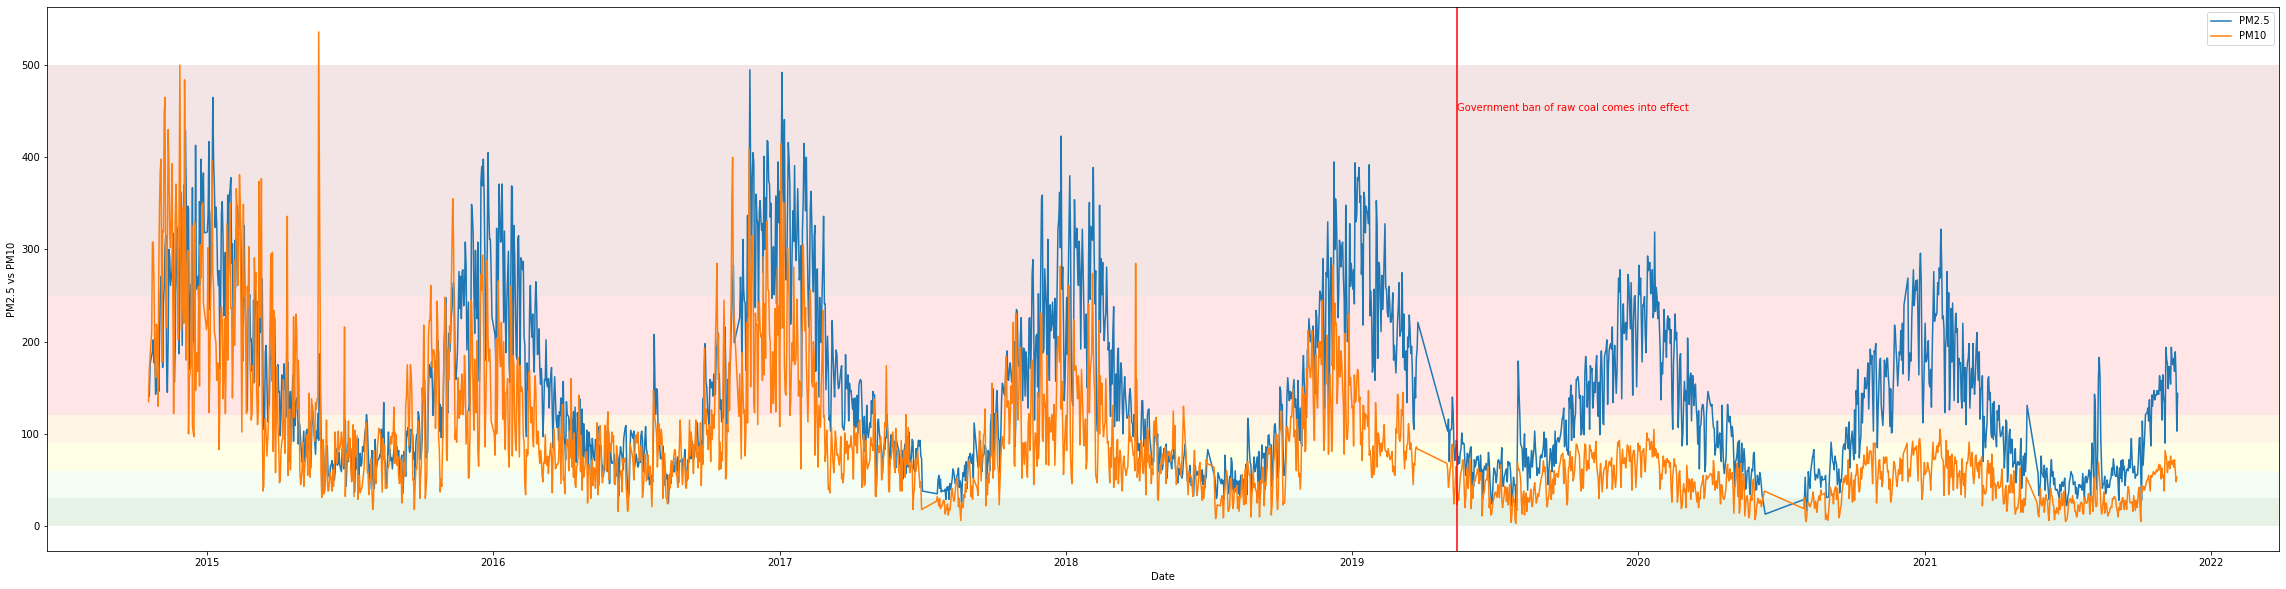

In [8]:
#MNB
plt.figure(figsize=(40,10))
sns.lineplot(x = 'date', y = 'pm25', data =mnb)
sns.lineplot(x = 'date', y = 'pm10', data =mnb)
plt.axvline(pd.Timestamp('2019-05-15'),color='r')
plt.text(pd.Timestamp('2019-05-15'), 450, "Government ban of raw coal comes into effect", horizontalalignment='left', size='medium', color='red')
plt.legend(labels=["PM2.5", "PM10"])
plt.xlabel("Date")
plt.ylabel("PM2.5 vs PM10")

plt.axhspan(0, 30, facecolor='green', alpha=0.1)
plt.axhspan(30, 60, facecolor='lightgreen', alpha=0.1)
plt.axhspan(60, 90, facecolor='yellow', alpha=0.1)
plt.axhspan(90, 120, facecolor='orange', alpha=0.1)
plt.axhspan(120, 250, facecolor='red', alpha=0.1)
plt.axhspan(250, 500, facecolor='darkred', alpha=0.1)

Observation: Data from MNB air quality monitor shows that the amount of 'PM10' droppped significantly since 2019. This dramatic decrease can be explained by the government ban of raw coal starting from 15th of May, 2019. 

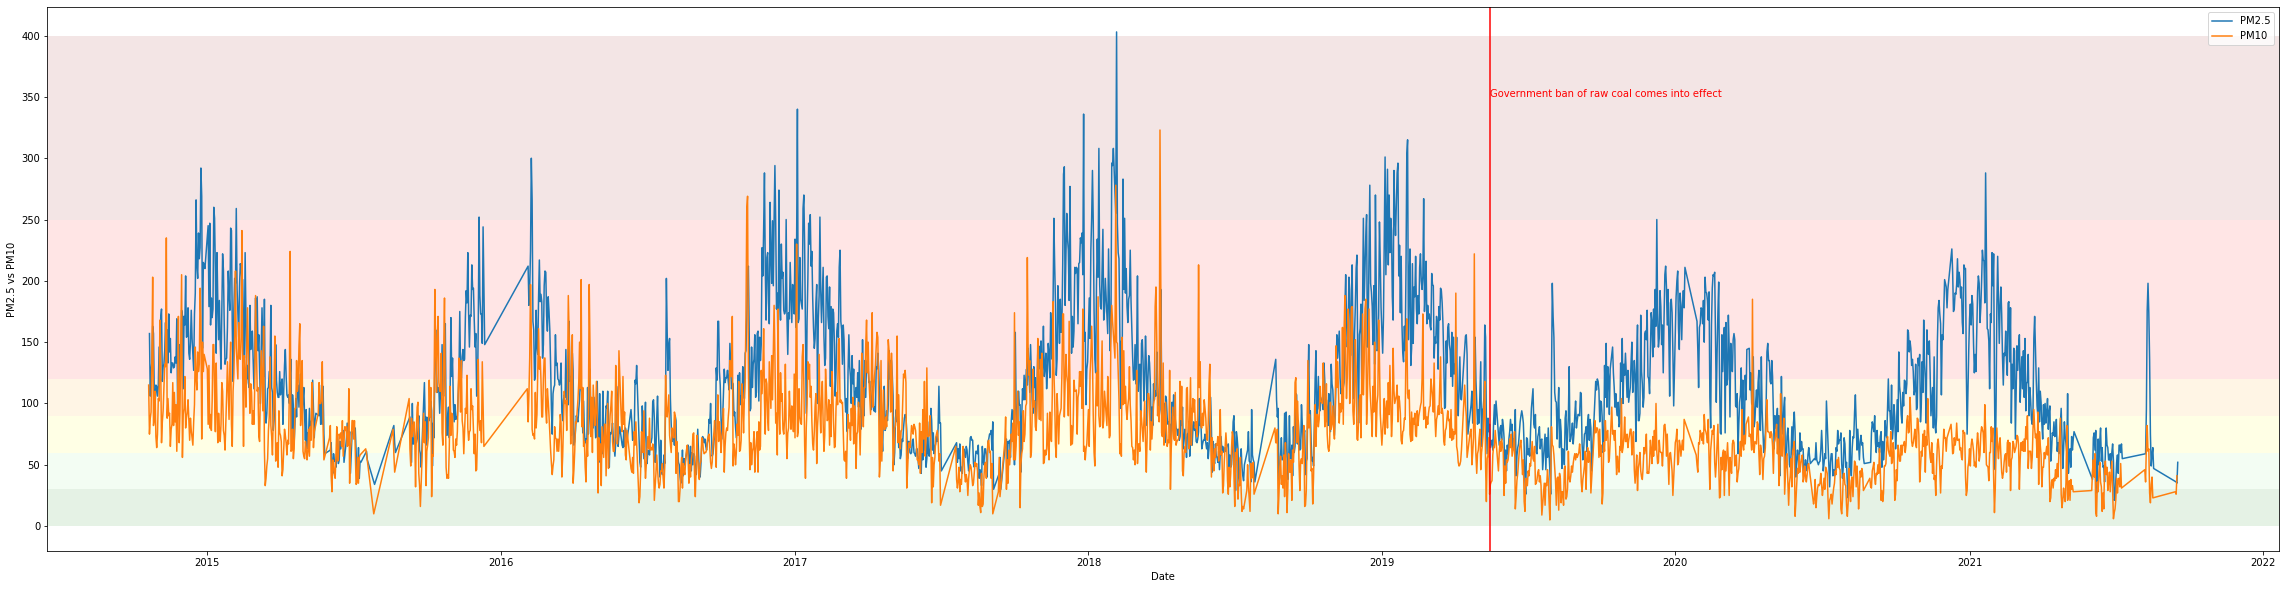

In [9]:
plt.figure(figsize=(40,10))
sns.lineplot(x = 'date', y = 'pm25', data =am)
sns.lineplot(x = 'date', y = 'pm10', data =am)
plt.axvline(pd.Timestamp('2019-05-15'),color='r')
plt.text(pd.Timestamp('2019-05-15'), 350, "Government ban of raw coal comes into effect", horizontalalignment='left', size='medium', color='red')
plt.legend(labels=["PM2.5", "PM10"])
plt.xlabel("Date")
plt.ylabel("PM2.5 vs PM10")

plt.axhspan(0, 30, facecolor='green', alpha=0.1)
plt.axhspan(30, 60, facecolor='lightgreen', alpha=0.1)
plt.axhspan(60, 90, facecolor='yellow', alpha=0.1)
plt.axhspan(90, 120, facecolor='orange', alpha=0.1)
plt.axhspan(120, 250, facecolor='red', alpha=0.1)
plt.axhspan(250, 400, facecolor='darkred', alpha=0.1)

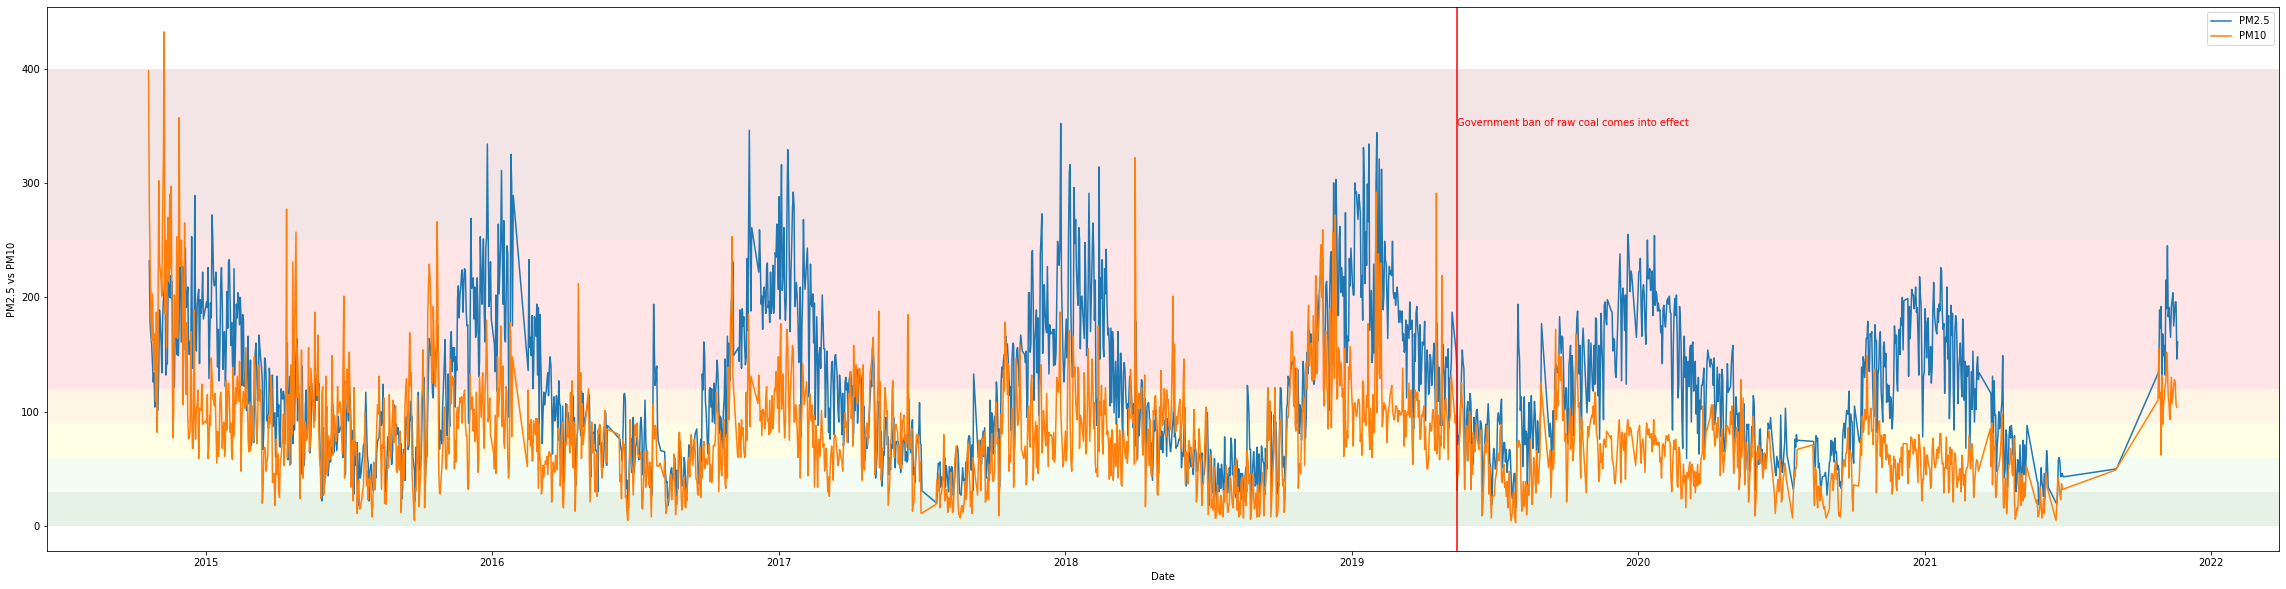

In [10]:
plt.figure(figsize=(40,10))
sns.lineplot(x = 'date', y = 'pm25', data =ni)
sns.lineplot(x = 'date', y = 'pm10', data =ni)
plt.axvline(pd.Timestamp('2019-05-15'),color='r')
plt.text(pd.Timestamp('2019-05-15'), 350, "Government ban of raw coal comes into effect", horizontalalignment='left', size='medium', color='red')
plt.legend(labels=["PM2.5", "PM10"])
plt.xlabel("Date")
plt.ylabel("PM2.5 vs PM10")

plt.axhspan(0, 30, facecolor='green', alpha=0.1)
plt.axhspan(30, 60, facecolor='lightgreen', alpha=0.1)
plt.axhspan(60, 90, facecolor='yellow', alpha=0.1)
plt.axhspan(90, 120, facecolor='orange', alpha=0.1)
plt.axhspan(120, 250, facecolor='red', alpha=0.1)
plt.axhspan(250, 400, facecolor='darkred', alpha=0.1)

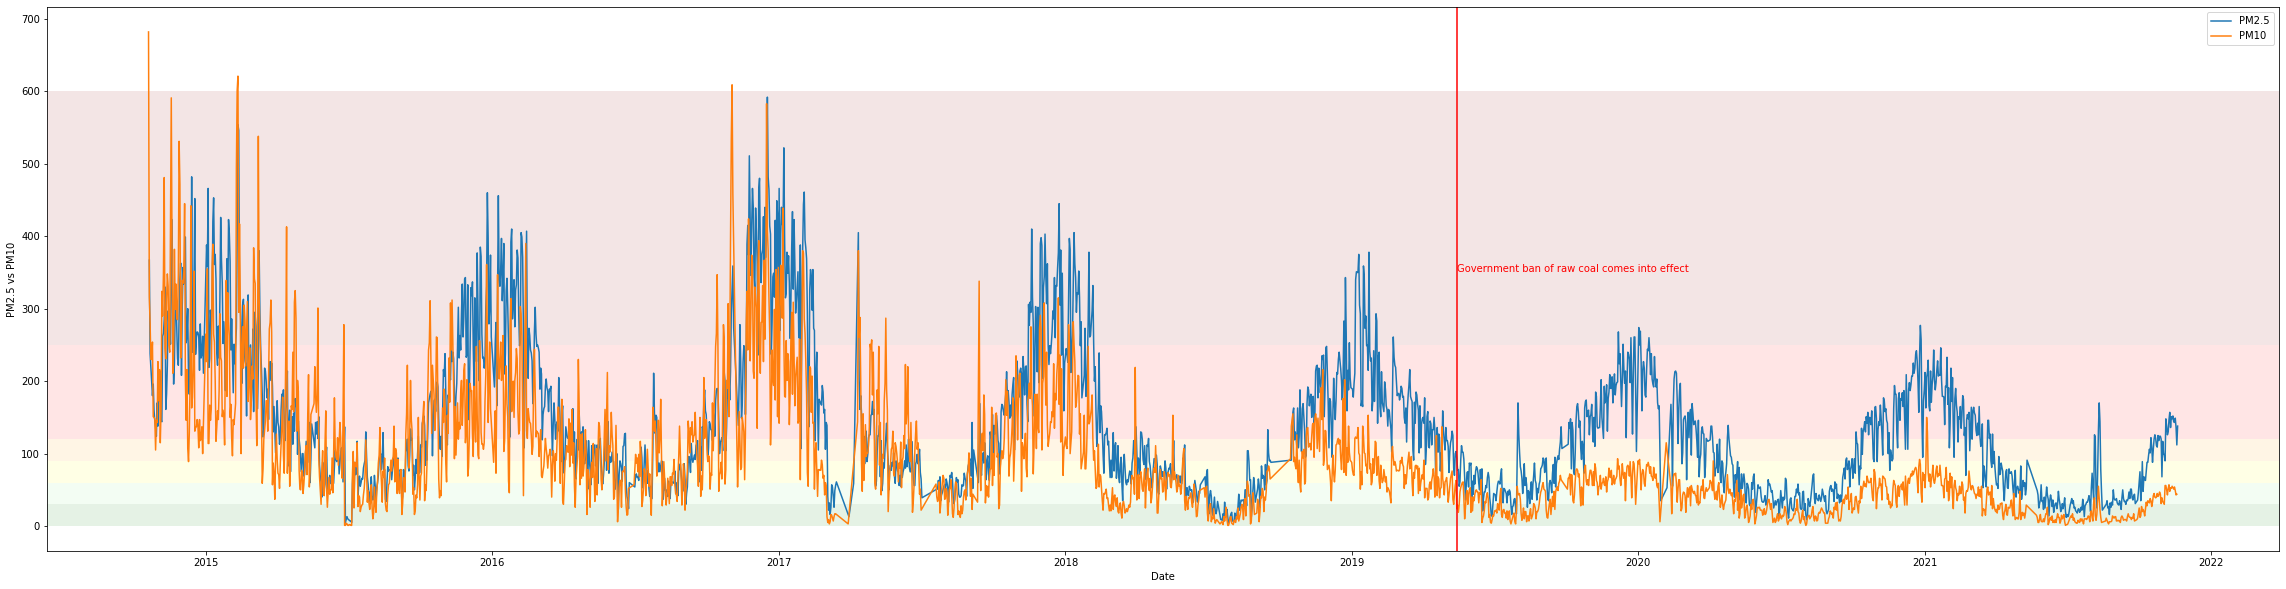

In [11]:
plt.figure(figsize=(40,10))
sns.lineplot(x = 'date', y = 'pm25', data =to)
sns.lineplot(x = 'date', y = 'pm10', data =to)
plt.axvline(pd.Timestamp('2019-05-15'),color='r')
plt.text(pd.Timestamp('2019-05-15'), 350, "Government ban of raw coal comes into effect", horizontalalignment='left', size='medium', color='red')
plt.legend(labels=["PM2.5", "PM10"])
plt.xlabel("Date")
plt.ylabel("PM2.5 vs PM10")

plt.axhspan(0, 30, facecolor='green', alpha=0.1)
plt.axhspan(30, 60, facecolor='lightgreen', alpha=0.1)
plt.axhspan(60, 90, facecolor='yellow', alpha=0.1)
plt.axhspan(90, 120, facecolor='orange', alpha=0.1)
plt.axhspan(120, 250, facecolor='red', alpha=0.1)
plt.axhspan(250, 600, facecolor='darkred', alpha=0.1)

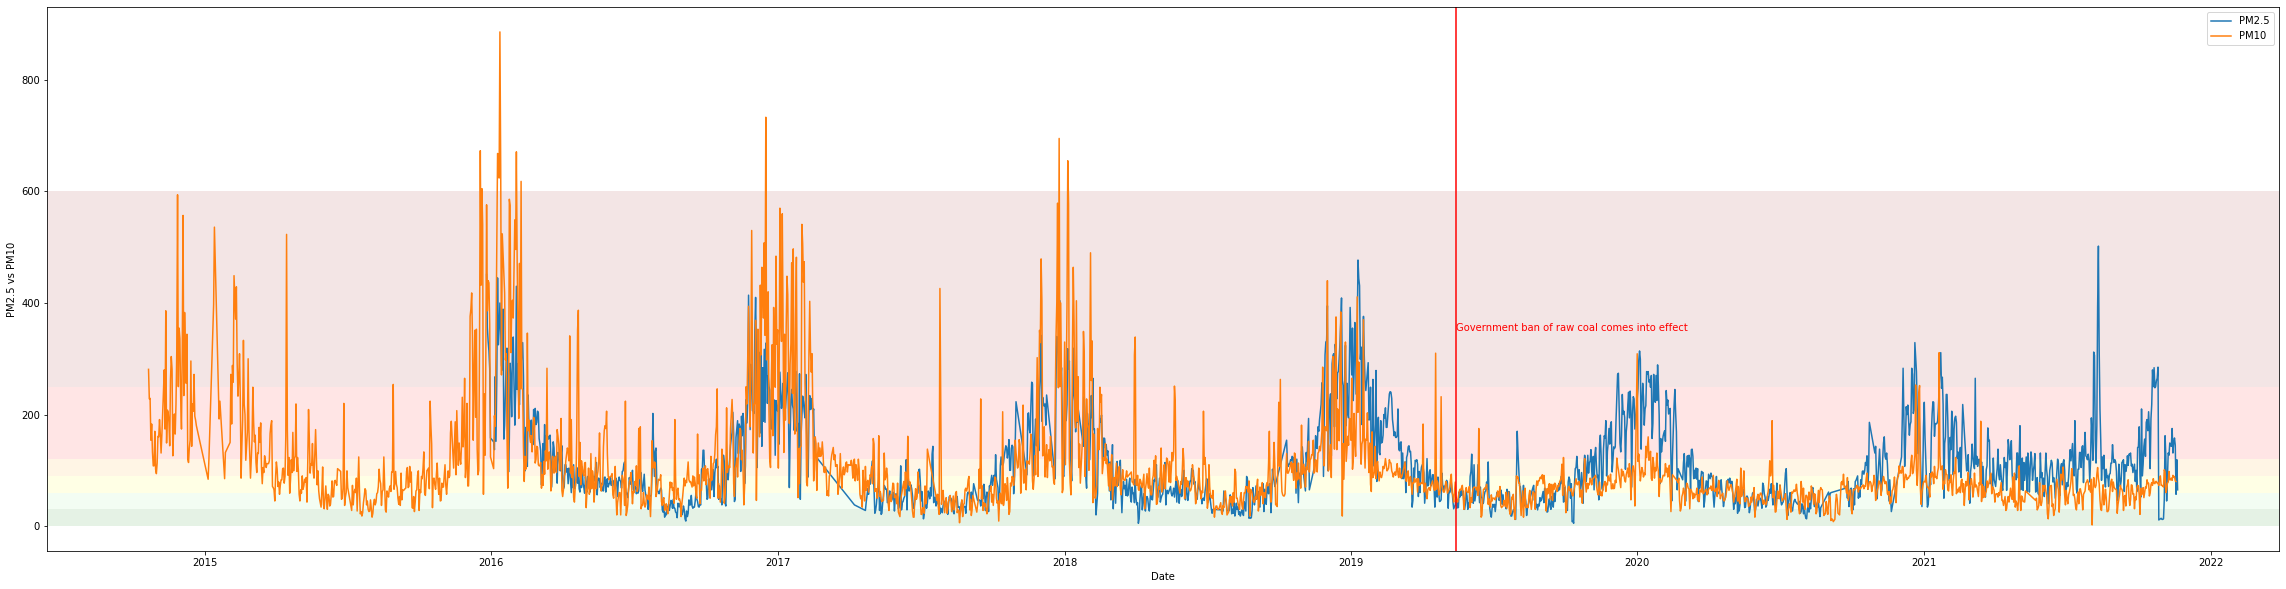

In [12]:
plt.figure(figsize=(40,10))
sns.lineplot(x = 'date', y = 'pm25', data =us)
sns.lineplot(x = 'date', y = 'pm10', data =us)
plt.axvline(pd.Timestamp('2019-05-15'),color='r')
plt.text(pd.Timestamp('2019-05-15'), 350, "Government ban of raw coal comes into effect", horizontalalignment='left', size='medium', color='red')
plt.legend(labels=["PM2.5", "PM10"])
plt.xlabel("Date")
plt.ylabel("PM2.5 vs PM10")

plt.axhspan(0, 30, facecolor='green', alpha=0.1)
plt.axhspan(30, 60, facecolor='lightgreen', alpha=0.1)
plt.axhspan(60, 90, facecolor='yellow', alpha=0.1)
plt.axhspan(90, 120, facecolor='orange', alpha=0.1)
plt.axhspan(120, 250, facecolor='red', alpha=0.1)
plt.axhspan(250, 600, facecolor='darkred', alpha=0.1)



# Air quality comparison by location

In [13]:
#Create a new column "year"
mnb['year'] = mnb.date.dt.year
us['year'] = us.date.dt.year
am['year'] = am.date.dt.year
ni['year'] = ni.date.dt.year
to['year'] = us.date.dt.year

Text(0.5, 1.0, 'PM2.5 and PM10 by location and year')

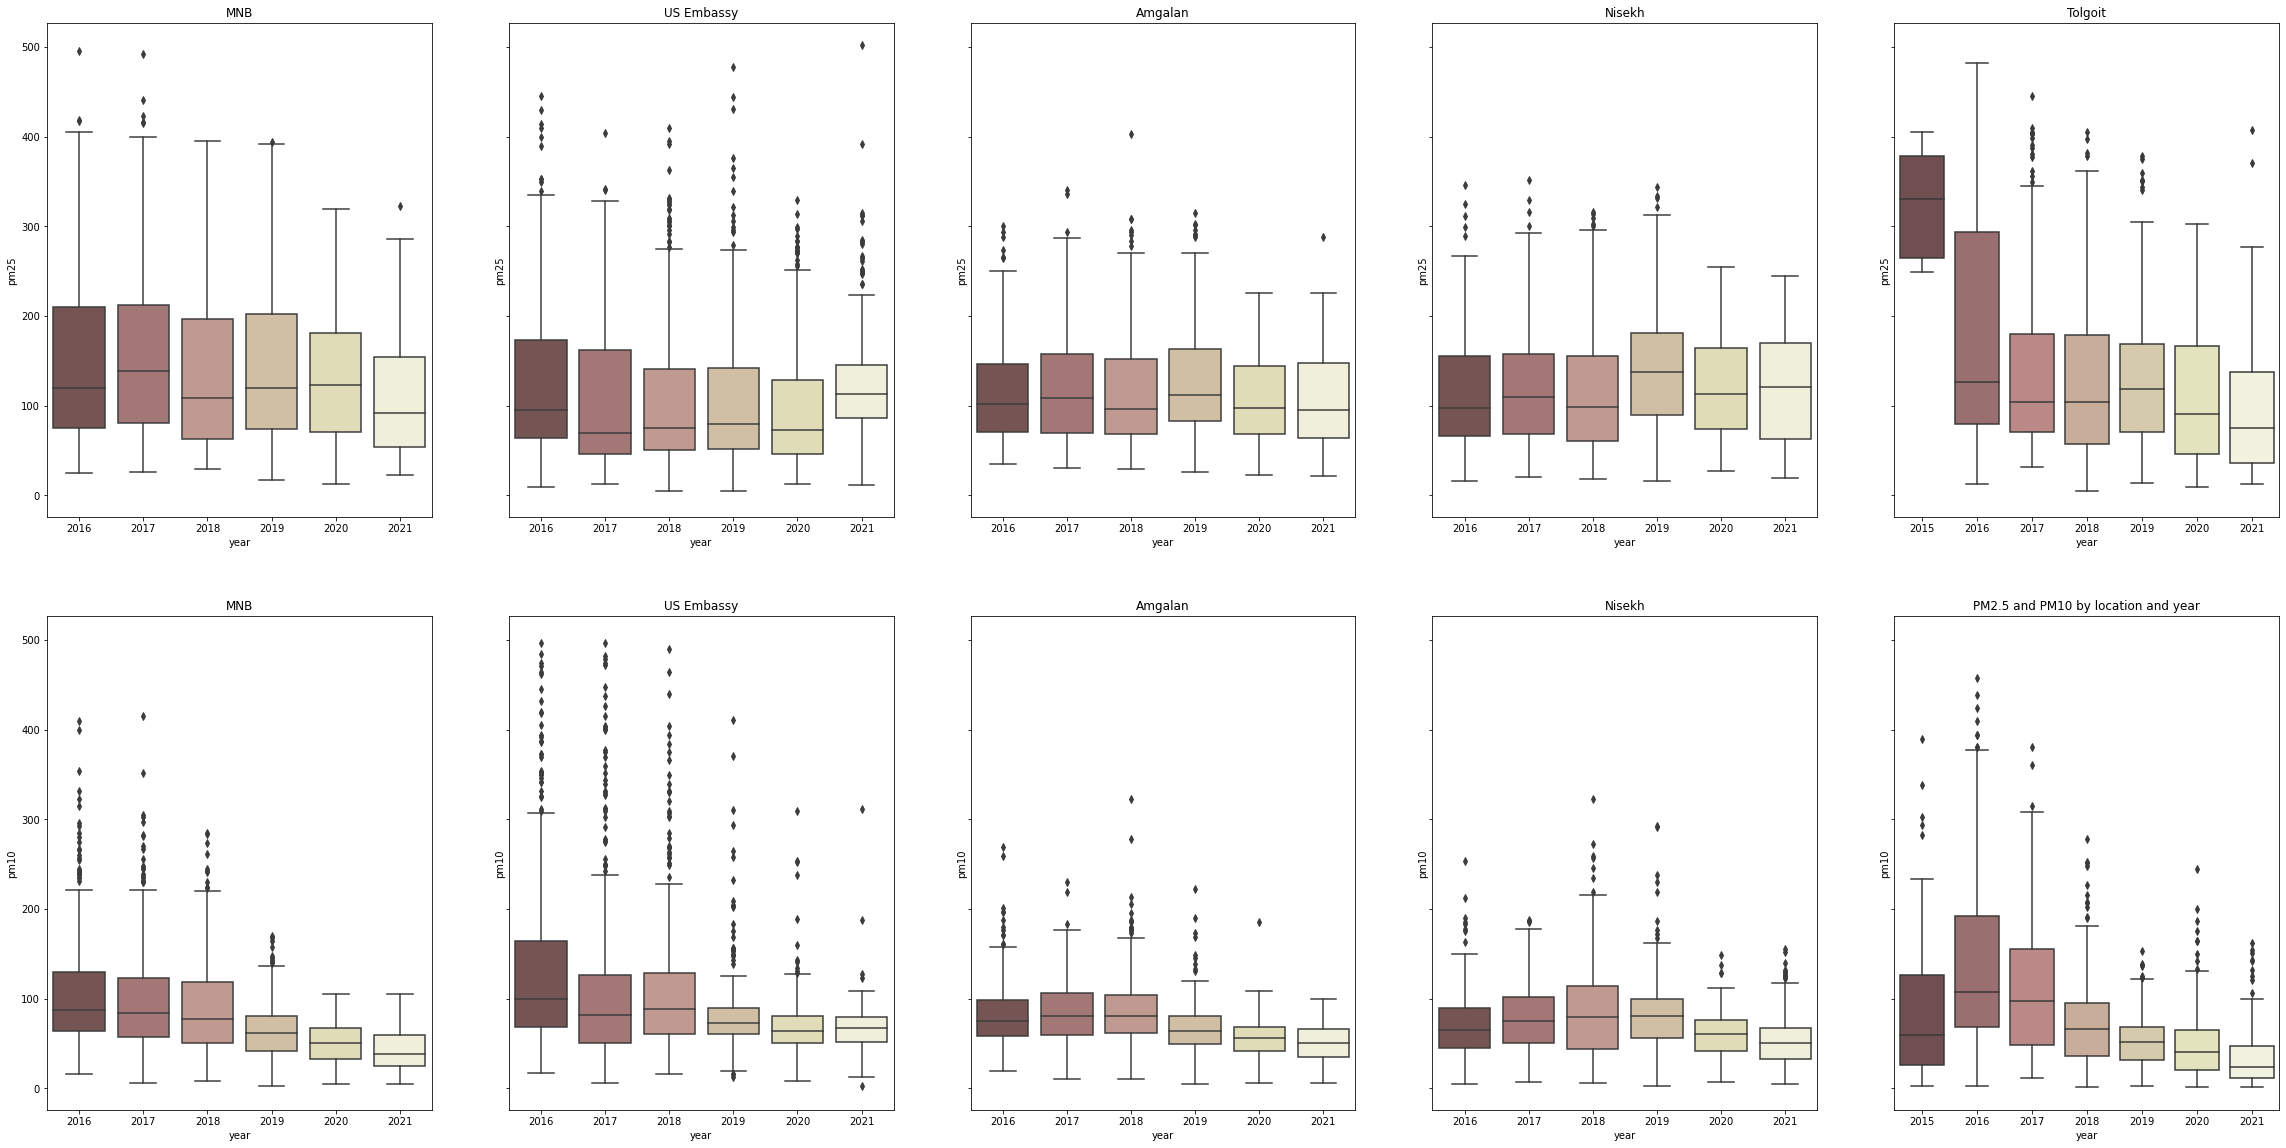

In [14]:

fig, axes = plt.subplots(2, 5, sharey = True, figsize=(40,20))
sns.boxplot(x = 'year', y = 'pm25', data=mnb[mnb.date >= '2016-01-01'], palette = 'pink', ax = axes[0, 0]).set_title("MNB")
sns.boxplot(x = 'year', y = 'pm25', data=us[us.date >= '2016-01-01'],palette = 'pink', ax = axes[0,1]).set_title("US Embassy")
sns.boxplot(x = 'year', y = 'pm25', data=am[am.date >= '2016-01-01'],palette = 'pink', ax = axes[0,2]).set_title("Amgalan")
sns.boxplot(x = 'year', y = 'pm25', data=ni[ni.date >= '2016-01-01'],palette = 'pink', ax = axes[0,3]).set_title("Nisekh")
sns.boxplot(x = 'year', y = 'pm25', data=to[(to.date >= '2016-01-01')&(to.pm25<500)],palette = 'pink', ax = axes[0,4]).set_title("Tolgoit")

sns.boxplot(x = 'year', y = 'pm10', data=mnb[mnb.date >= '2016-01-01'], palette = 'pink', ax = axes[1,0]).set_title("MNB")
sns.boxplot(x = 'year', y = 'pm10', data=us[(us.date >= '2016-01-01') & (us.pm10<500)],palette = 'pink', ax = axes[1,1]).set_title("US Embassy")
sns.boxplot(x = 'year', y = 'pm10', data=am[am.date >= '2016-01-01'],palette = 'pink', ax = axes[1,2]).set_title("Amgalan")
sns.boxplot(x = 'year', y = 'pm10', data=ni[ni.date >= '2016-01-01'],palette = 'pink', ax = axes[1,3]).set_title("Nisekh")
sns.boxplot(x = 'year', y = 'pm10', data=to[(to.date >= '2016-01-01') &(to.pm10<500)],palette = 'pink', ax = axes[1,4]).set_title("Tolgoit")

plt.title("PM2.5 and PM10 by location and year")



Text(0.5, 1.0, 'PM2.5 and PM10 by location and year')

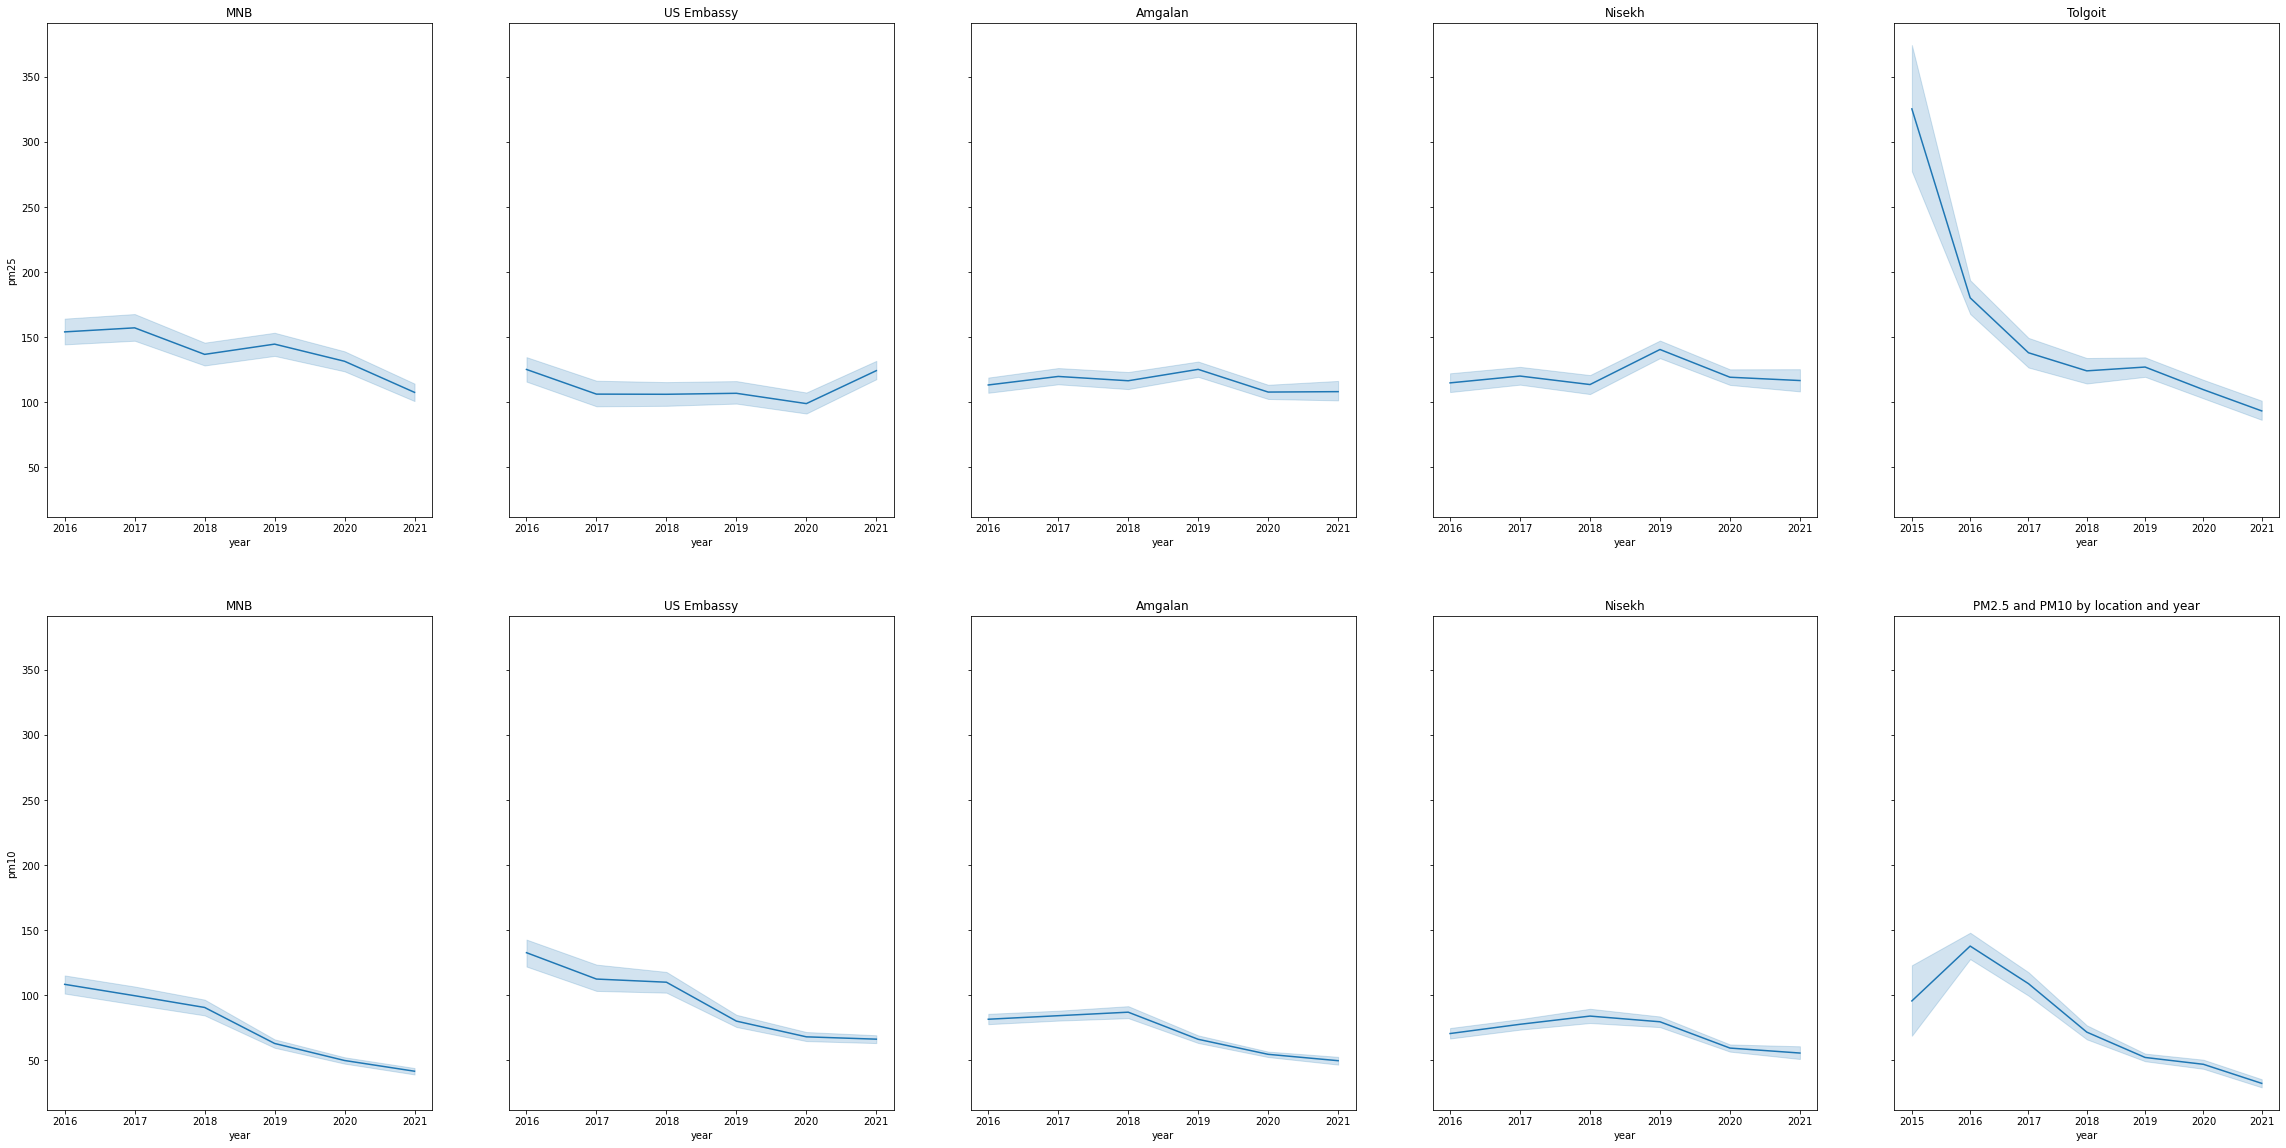

In [15]:

fig, axes = plt.subplots(2, 5, sharey = True, figsize=(40,20))
sns.lineplot(x = 'year', y = 'pm25', data=mnb[mnb.date >= '2016-01-01'], palette = 'pink', ax = axes[0, 0]).set_title("MNB")
sns.lineplot(x = 'year', y = 'pm25', data=us[us.date >= '2016-01-01'],palette = 'pink', ax = axes[0,1]).set_title("US Embassy")
sns.lineplot(x = 'year', y = 'pm25', data=am[am.date >= '2016-01-01'],palette = 'pink', ax = axes[0,2]).set_title("Amgalan")
sns.lineplot(x = 'year', y = 'pm25', data=ni[ni.date >= '2016-01-01'],palette = 'pink', ax = axes[0,3]).set_title("Nisekh")
sns.lineplot(x = 'year', y = 'pm25', data=to[(to.date >= '2016-01-01')&(to.pm25<500)],palette = 'pink', ax = axes[0,4]).set_title("Tolgoit")

sns.lineplot(x = 'year', y = 'pm10', data=mnb[mnb.date >= '2016-01-01'], palette = 'pink', ax = axes[1,0]).set_title("MNB")
sns.lineplot(x = 'year', y = 'pm10', data=us[(us.date >= '2016-01-01') & (us.pm10<500)],palette = 'pink', ax = axes[1,1]).set_title("US Embassy")
sns.lineplot(x = 'year', y = 'pm10', data=am[am.date >= '2016-01-01'],palette = 'pink', ax = axes[1,2]).set_title("Amgalan")
sns.lineplot(x = 'year', y = 'pm10', data=ni[ni.date >= '2016-01-01'],palette = 'pink', ax = axes[1,3]).set_title("Nisekh")
sns.lineplot(x = 'year', y = 'pm10', data=to[(to.date >= '2016-01-01') &(to.pm10<500)],palette = 'pink', ax = axes[1,4]).set_title("Tolgoit")

plt.title("PM2.5 and PM10 by location and year")


### Observation

These graphs show that PM10 in air significantly decreased since the ban of raw coal; however, PM2.5 is not decreased as same as PM10. Amount of PM2.5 in the air still reaches to the hazardous level during winter times. 

